# Proyecto de Prediciendo la diabetes de Luisa

In [19]:
import pandas as pd

url_test = "https://raw.githubusercontent.com/DalynLC/RandomForest/main/data/processed/diabetes_test.csv"
url_train = "https://raw.githubusercontent.com/DalynLC/RandomForest/main/data/processed/diabetes_train.csv"

df_test = pd.read_csv(url_test)
df_train = pd.read_csv(url_train)

df_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.058824,0.419355,0.142857,0.012195,0.123188,0.100204,0.140478,0.083333,0.0
1,0.000000,0.361290,0.469388,0.109756,0.038647,0.257669,0.221605,0.000000,0.0
2,0.000000,0.877419,0.428571,0.268293,0.074879,0.486708,0.774979,0.066667,1.0
3,0.235294,0.548387,0.632653,0.036585,0.304348,0.345603,0.065329,0.033333,0.0
4,0.117647,0.258065,0.265306,0.073171,0.070048,0.249489,0.380017,0.000000,0.0


In [20]:
# Separar características (X) y etiquetas (y)
X_train = df_train.drop(["Outcome"], axis=1)
y_train = df_train["Outcome"]
X_test = df_test.drop(["Outcome"], axis=1)
y_test = df_test["Outcome"]

# (Opcional) Verificación rápida
print(X_train.head())
print(y_train.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.419355       0.142857       0.012195  0.123188  0.100204   
1     0.000000  0.361290       0.469388       0.109756  0.038647  0.257669   
2     0.000000  0.877419       0.428571       0.268293  0.074879  0.486708   
3     0.235294  0.548387       0.632653       0.036585  0.304348  0.345603   
4     0.117647  0.258065       0.265306       0.073171  0.070048  0.249489   

   DiabetesPedigreeFunction       Age  
0                  0.140478  0.083333  
1                  0.221605  0.000000  
2                  0.774979  0.066667  
3                  0.065329  0.033333  
4                  0.380017  0.000000  
0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Outcome, dtype: float64


In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

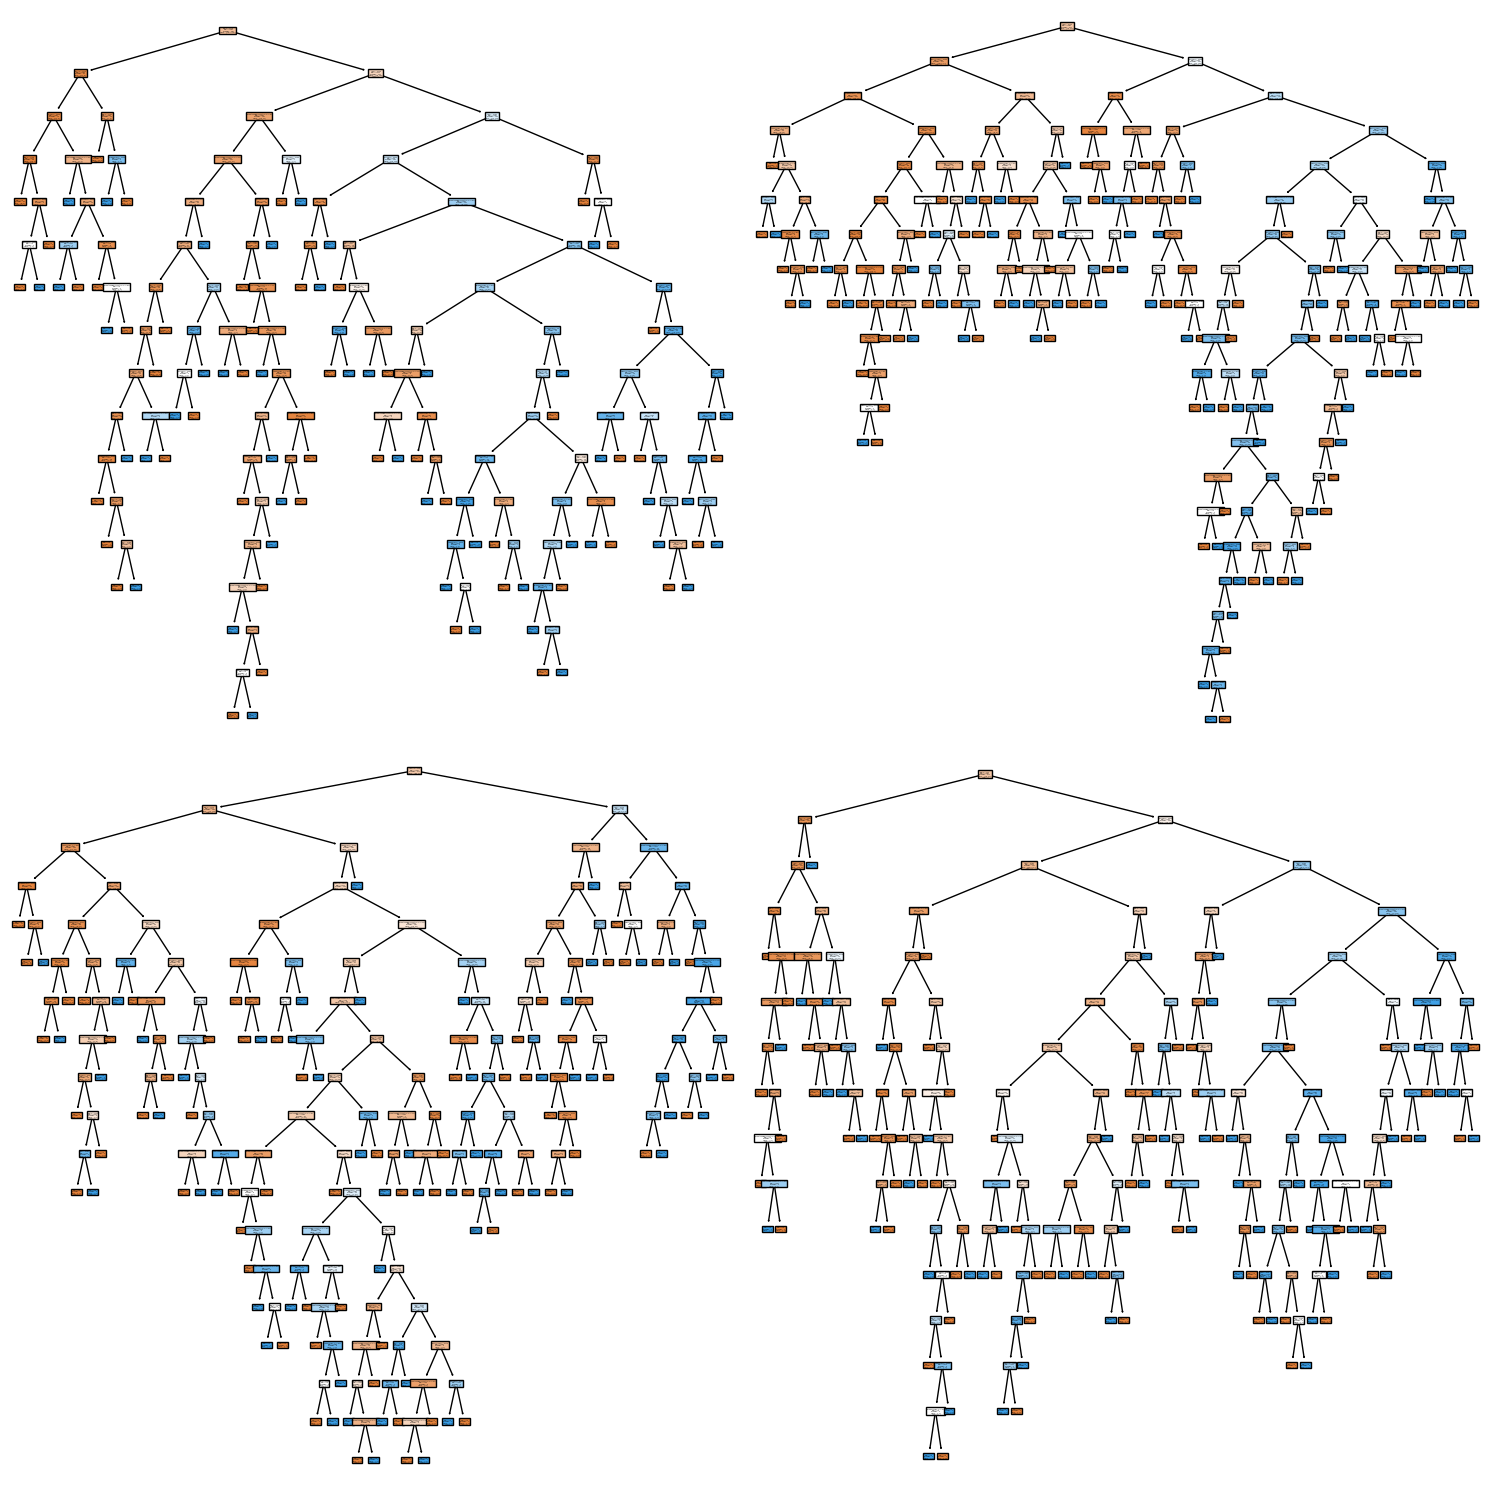

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostrar los primeros 4 árboles generados (por defecto 100 árboles)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.tight_layout()
plt.show()

In [26]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Imprimir las predicciones
print(y_pred)

[1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 1.]


In [27]:
from sklearn.metrics import accuracy_score

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión
print(accuracy)

0.7615894039735099


El resultado de la precisión, 0.7616 (aproximadamente 76.16%), indica que el modelo de Random Forest está clasificando correctamente el 76.16% de las instancias en el conjunto de prueba. Esto sugiere que el modelo tiene un desempeño moderado, con un buen equilibrio entre precisión y capacidad de generalización.

In [28]:
#Optimización parametros 
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el espacio de búsqueda de hiperparámetros
random_grid = {
    "max_depth": [4, 8, 10, 30, 50, 100, 120],
    'min_samples_split': [10, 30, 50, 100, 150],
    'min_samples_leaf': [10, 30, 50, 100, 150],
    'max_features': [None, 'sqrt', 'log2'],
    'n_estimators': [100, 150, 180, 200]
}

# Inicializar RandomizedSearchCV con el clasificador RandomForest
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   random_grid,
                                   n_iter=10,  # Número de combinaciones aleatorias a probar
                                   random_state=42)

# Ajustar el modelo
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Best hyperparameters: ", random_search.best_params_)


Best hyperparameters:  {'n_estimators': 180, 'min_samples_split': 50, 'min_samples_leaf': 30, 'max_features': None, 'max_depth': 8}


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo con los hiperparámetros especificados
model = RandomForestClassifier(
    random_state=42,
    max_depth=120,
    max_features=None,
    min_samples_leaf=10,
    min_samples_split=10,
    n_estimators=100
)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=120, max_features=None, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [38]:
# Realizar predicciones con el modelo entrenado
y_pred = model.predict(X_test)

# Imprimir las predicciones
print(y_pred)


[1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 1.]


In [39]:
from sklearn.metrics import accuracy_score

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión
print(accuracy)


0.8013245033112583


El resultado de la precisión, 0.8013 (aproximadamente 80.13%), indica que el modelo de Random Forest tiene un desempeño bastante bueno, clasificando correctamente el 80.13% de las instancias en el conjunto de prueba. Este valor sugiere que el modelo está capturando bien la relación entre las características y las etiquetas, mostrando una capacidad sólida de generalización. 

In [40]:
from pickle import dump

# Guardar el modelo entrenado en un archivo .sav
dump(model, open("../models/ranfor_classifier_nestimators-150_42.sav", "wb"))


El modelo de Random Forest ha demostrado ser eficaz para el problema de clasificación, alcanzando una precisión de aproximadamente 80.13% en el conjunto de prueba. Utilizando hiperparámetros como un max_depth de 120, min_samples_leaf de 10 y 150 estimadores, el modelo ha logrado un buen desempeño, indicando que captura adecuadamente las relaciones en los datos. Además, con la implementación de búsqueda aleatoria de hiperparámetros y la posterior evaluación mediante métricas como la precisión, se asegura que el modelo sea optimizado. 